In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style()
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#导入数据集

df = pd.read_csv('D:\\py_dataset\\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

该数据集有303个样本，14个列。

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 各列特征解释说明

该数据集共有303个病人样本，共有14列，其中13列为特征值，一列为标签值。

age:年龄

sex:性别

cp:心绞痛类型，1：典型心绞痛，2：非典型心绞痛，3：无心绞痛，4：无症状

trestnps:静息血压（单位：mm.gh，入院时测量得到）

chol:血清胆固醇，单位mg/dl

fbs:空腹血糖，如果空腹血糖>120mg/dl，值为1，<120mg/dl，值为0

restecg:静息心电图扫描结果，0：正常，1：ST-T波有异常，2：根据埃斯特的标准显示可能的或确定的左心室肥大

thalach:最大心率

exang:运动是否诱发心绞痛，1表示Yes，0表示No

oldpeak:运动相对于休息，心电图中的ST-T波是否会被压平

slope:心电图中ST波峰的斜率（1：上升，2：平坦，3：下降）

ca:心脏周边大血管的个数（0~3）

thal:是否患有地中海贫血症（0：未知，3：无，6：fixed defect，7：reversable defect）

target：标签列。是否患有心脏病，0表示没有，1表示有

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file('profile.html')

### 1.探索性分析及数据可视化

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


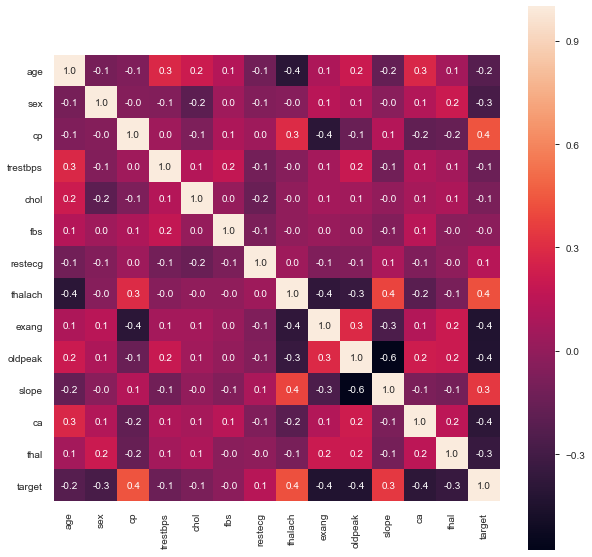

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True,fmt = '.1f',square = True)

由上图可知，两两特征之间的相关性的取值范围为-0.4~0.4，特征之间没有明显的强相关性。

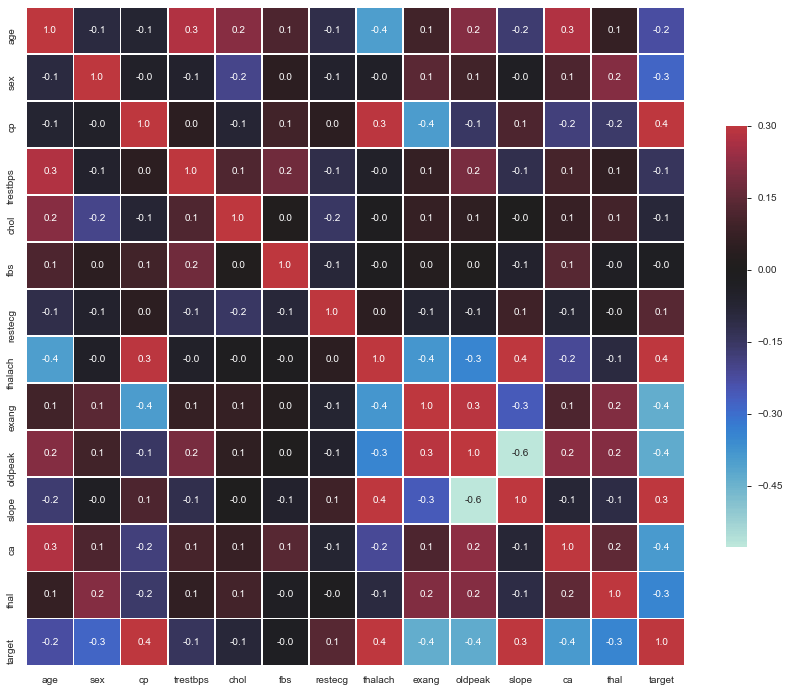

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f')
plt.tight_layout()

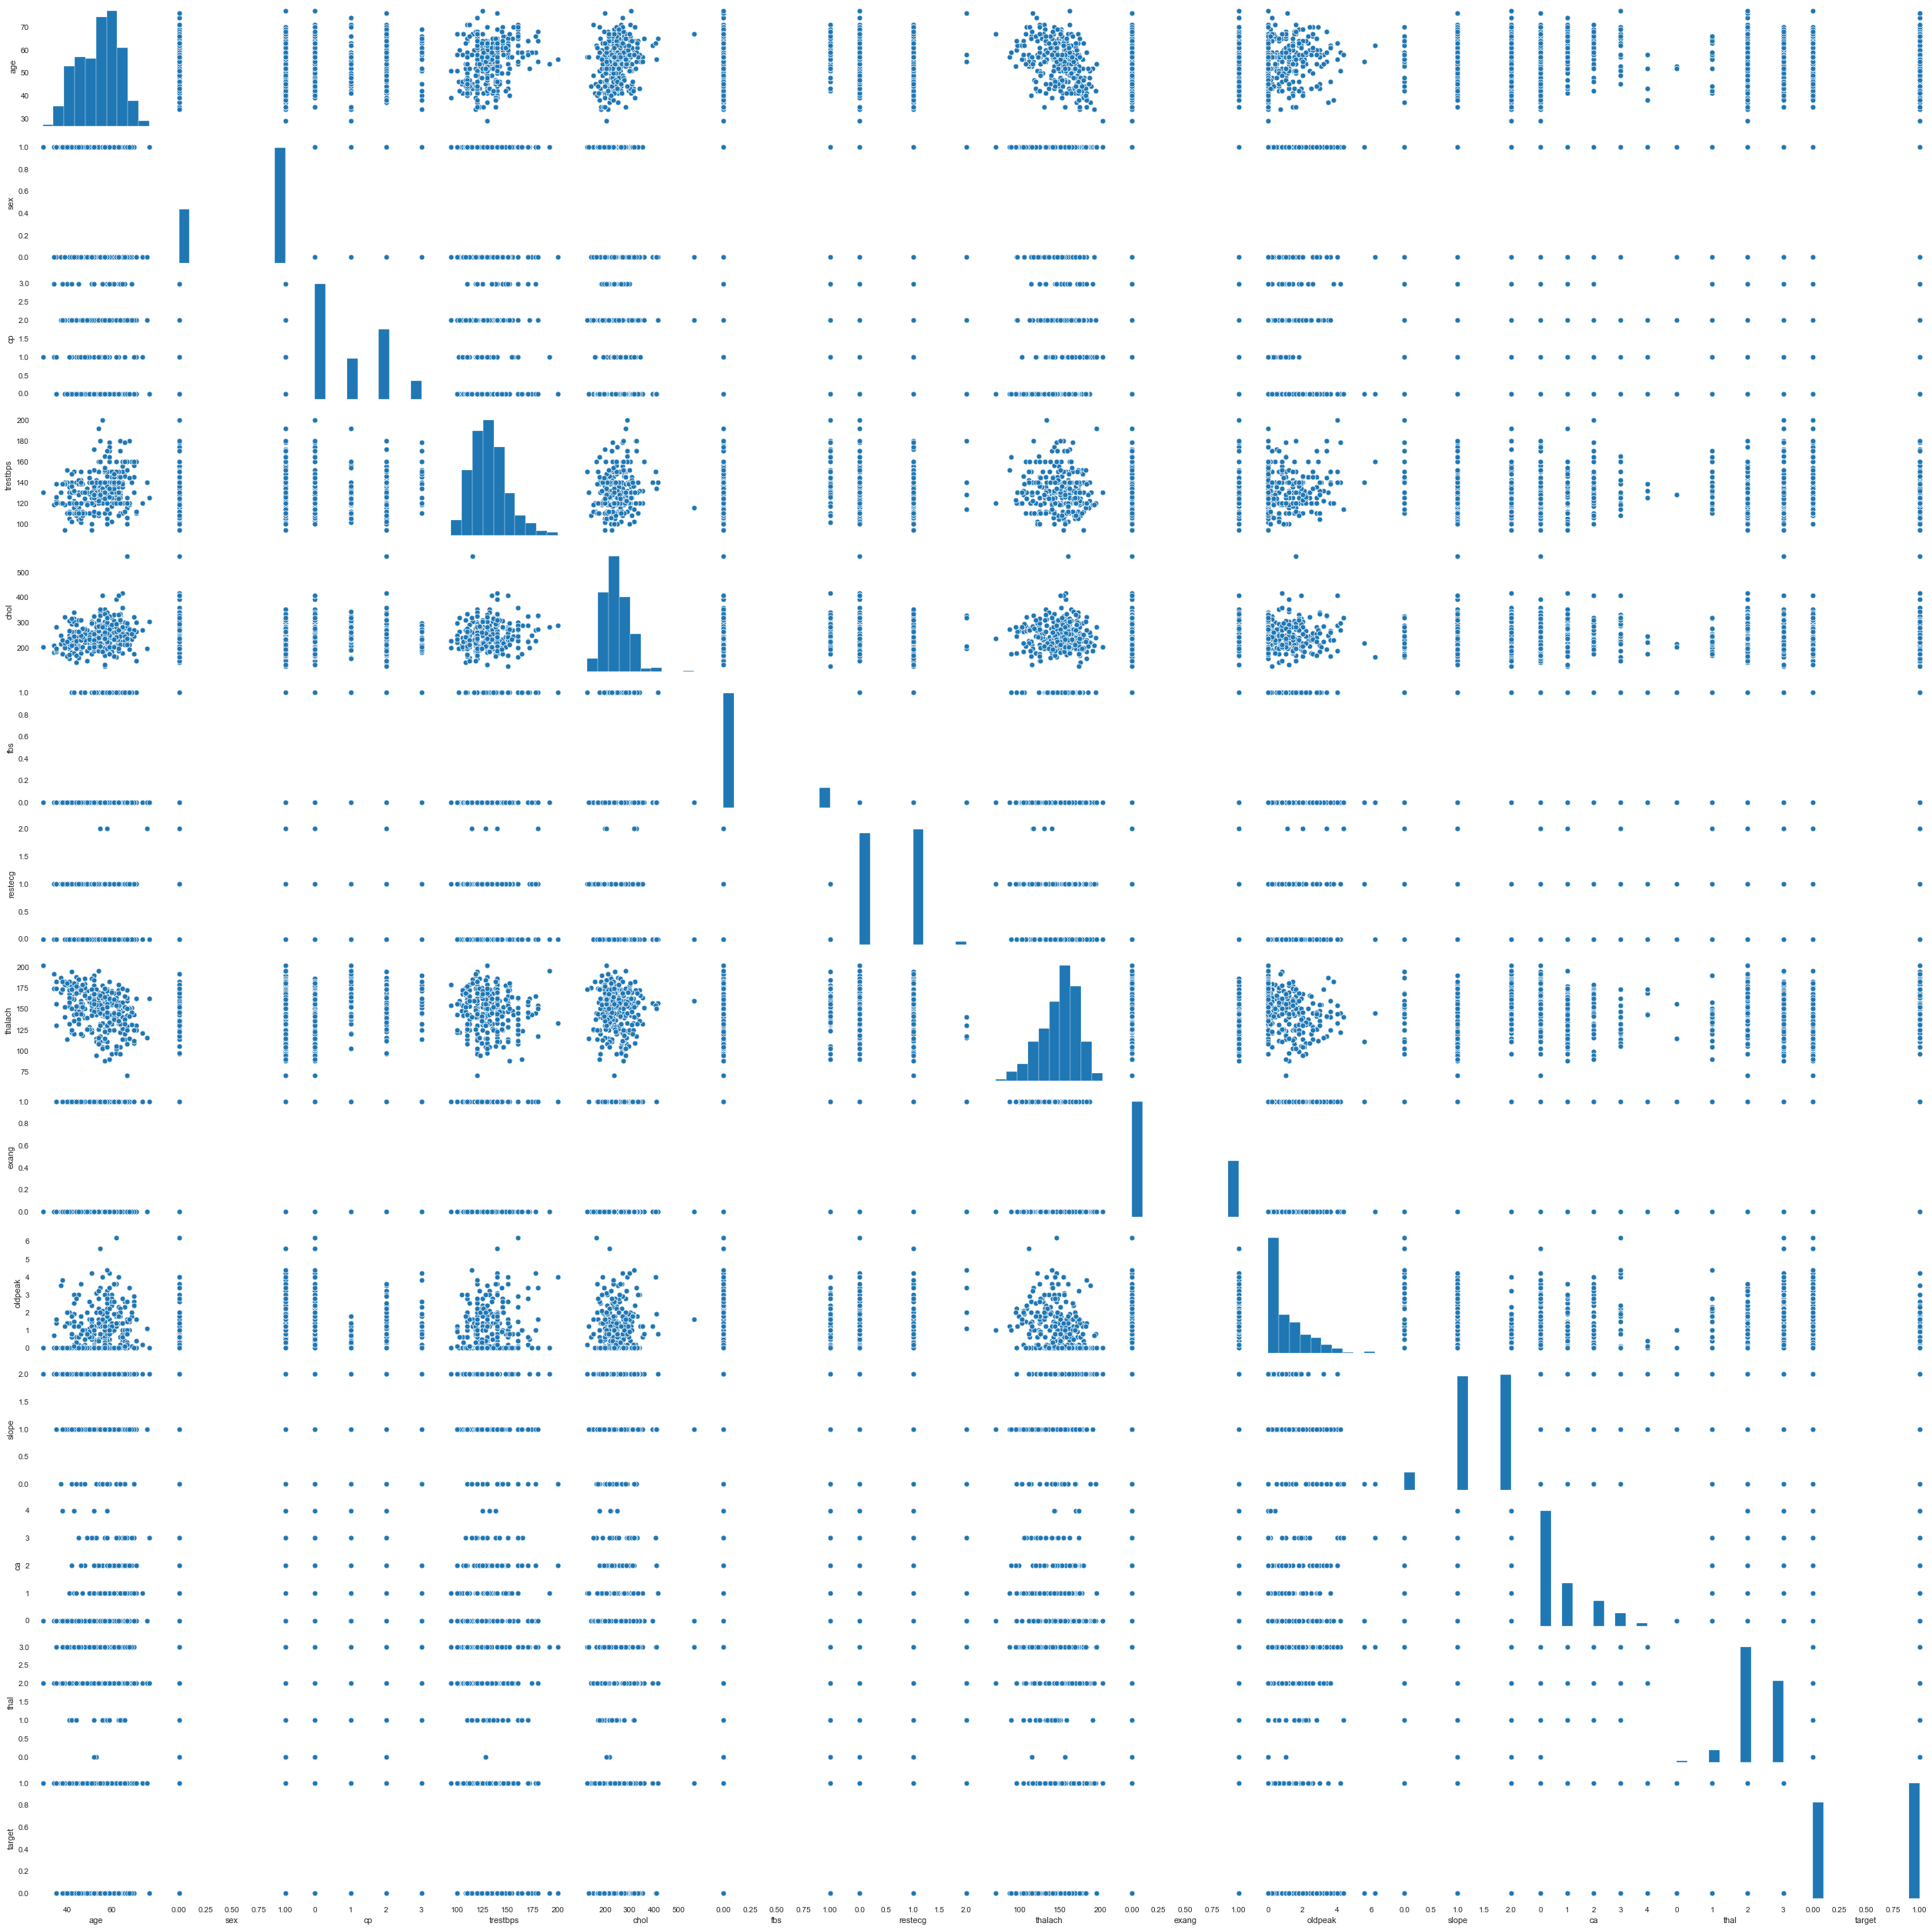

In [17]:
sns.pairplot(df)

### 2.单个特征统计分布分析

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**2.1 年龄特征的统计分布**

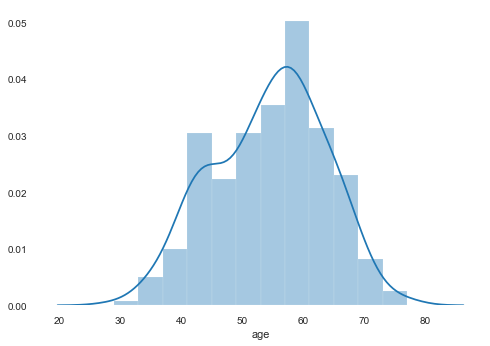

In [22]:
sns.distplot(df['age'])

**2.2 患者人数的统计分布**

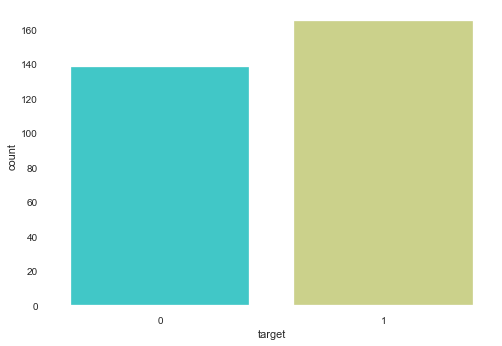

In [25]:
sns.countplot(df['target'],palette = 'rainbow')

In [27]:
df['target'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

从上图可知，患病人数和不患病人数的比例基本上接近。

**2.3 性别的分布**

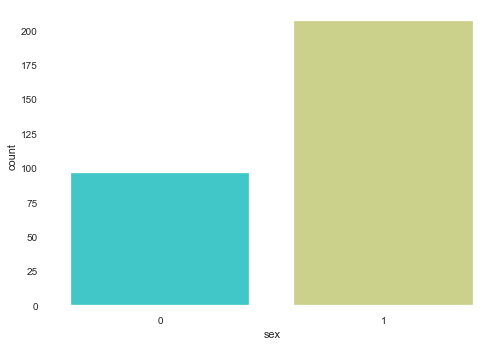

In [28]:
sns.countplot(df['sex'],palette = 'rainbow')

In [29]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

从上述结果可知，男性的人数远多于女性人数。

### 3.单个特征与标签之间的关系

**3.1 年龄与是否患病之间的关系**

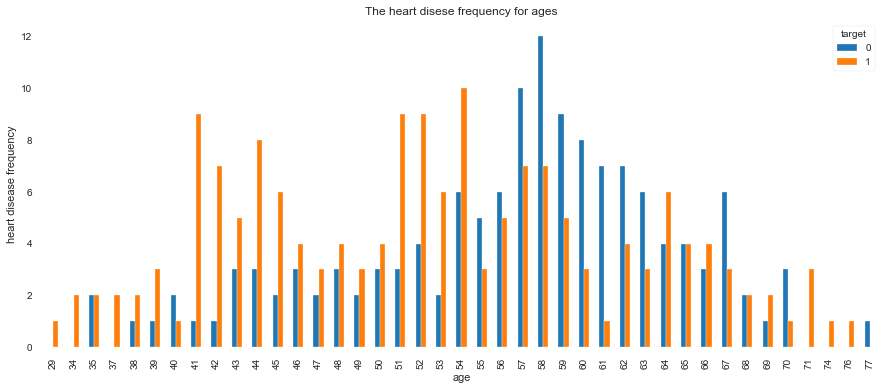

In [38]:
pd.crosstab(df['age'],df['target']).plot(kind = 'bar',figsize = (15,6))
plt.title('The heart disese frequency for ages')
plt.xlabel('age')
plt.ylabel('heart disease frequency')
plt.savefig('heart disease distribution with ages.png')

箱型图与小提琴图

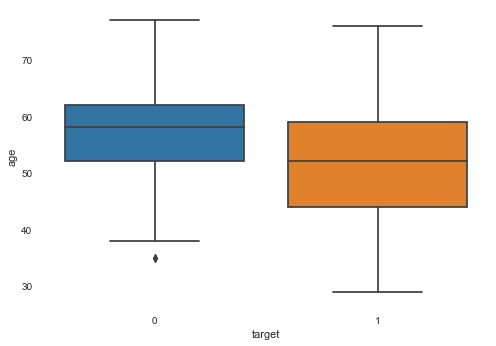

In [40]:
sns.boxplot(data = df,x = 'target',y = 'age')

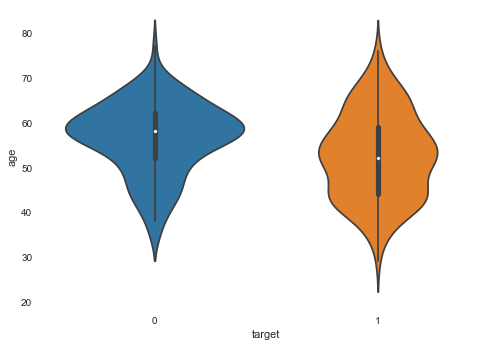

In [45]:
sns.violinplot(data = df,x = 'target',y = 'age')
plt.savefig('age.png')

从上图可以看出患有心脏病的人的平均年龄低于未患有心脏病的人的平均年龄。

**3.2 性别与患病与否的关系**

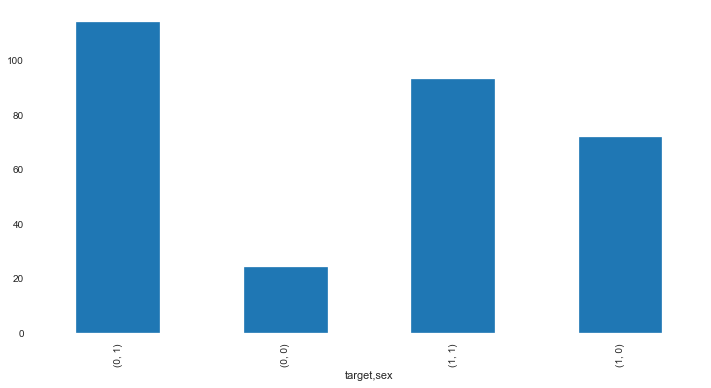

In [47]:
df.groupby('target')['sex'].value_counts().plot(kind = 'bar',figsize = (12,6))

从上图可以看出，未患有心脏病的人中，男性的人数要远高于女性人数。患有心脏病的人数中，男性的人数稍微多余女性人数。这也与数据集中男女采样比例有关。

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**3.3 不同的心绞痛类型与是否患心脏病的关系**

Text(0, 0.5, 'frequency')

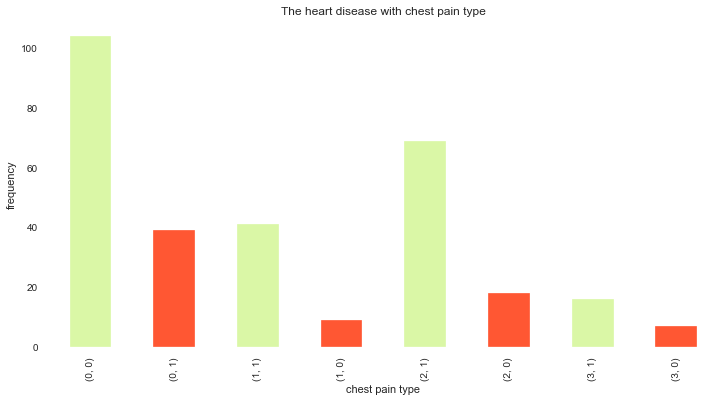

In [66]:
df.groupby('cp')['target'].value_counts().plot(kind = 'bar',figsize = (12,6),color=['#DAF7A6','#FF5733' ])
plt.title('The heart disease with chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('frequency')

从上图可知，无心绞痛的患者患有心脏病的人数最多，其次是患有非典型性心绞痛，典型性心绞痛，无症状患者。

**3.4 空腹血糖与是否患有心脏病的关系**

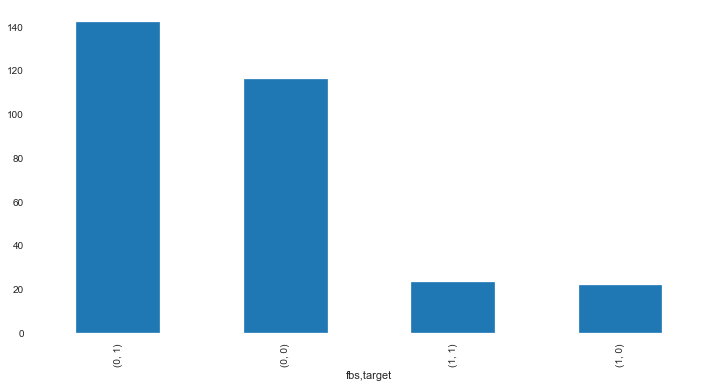

In [52]:
df.groupby('fbs')['target'].value_counts().plot(kind = 'bar',figsize = (12,6))

从上图可知，空腹血糖含量<120mg/dl的人群患有心脏病概率更高。

**3.5 ST-T图与是否患有心脏病的关系**

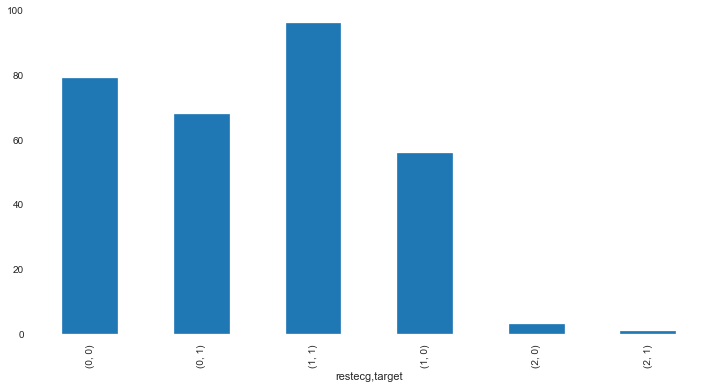

In [53]:
df.groupby('restecg')['target'].value_counts().plot(kind = 'bar',figsize = (12,6))

从上图可知，ST-T有异常的人群患有心脏病的人数是最多的。

**3.6 运动是否诱发心绞痛与患有心脏病的关系**

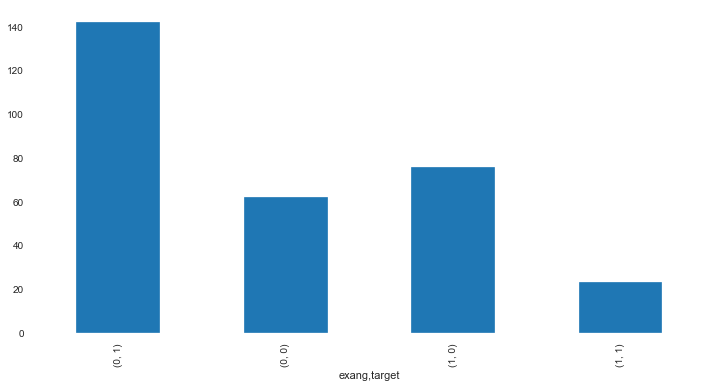

In [54]:
df.groupby('exang')['target'].value_counts().plot(kind = 'bar',figsize = (12,6))

从上图可知，运动没有心绞痛的人群患有心脏病的人数更多。

**3.7 心电图中ST波峰的斜率与是否患有心脏病的关系**

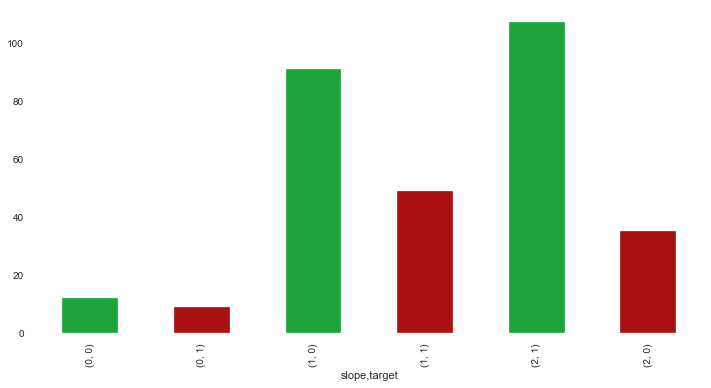

In [65]:
df.groupby('slope')['target'].value_counts().plot(kind = 'bar',figsize = (12,6),color=['#1CA53B','#AA1111' ])

从上图可以看出，ST下降的人群患有心脏病的人数是最多的。

**3.8 心脏周边大血管的个数与是否换心脏病的关系**

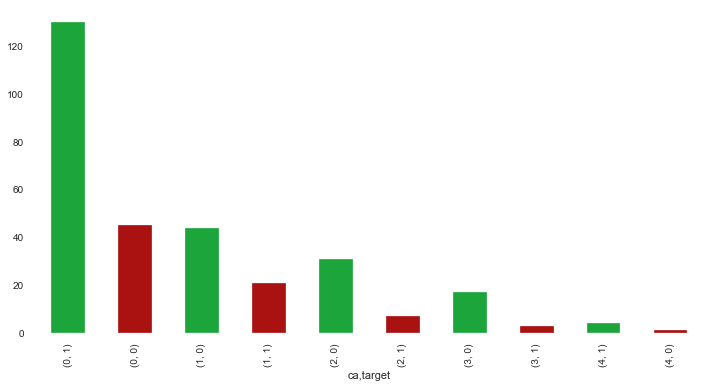

In [64]:
df.groupby('ca')['target'].value_counts().plot(kind = 'bar',figsize = (12,6),color=['#1CA53B','#AA1111' ])

从上图可以看出，随着心脏周边大血管的个数的增加，患有心脏病的急剧下降。

### 4.两个特征与标签之间的关系

**4.1 静息血压,年龄与患有心脏病的关系**

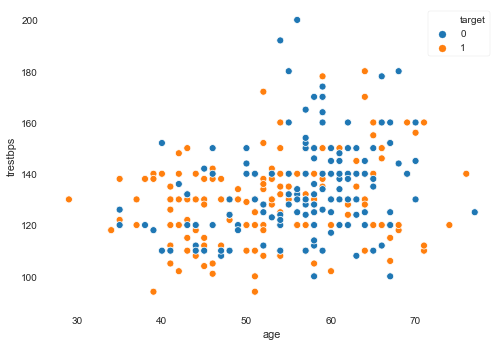

In [61]:
sns.scatterplot(data = df,x = 'age',y = 'trestbps',hue = 'target' )

**4.2 最大心率,年龄与患心脏病的关系**

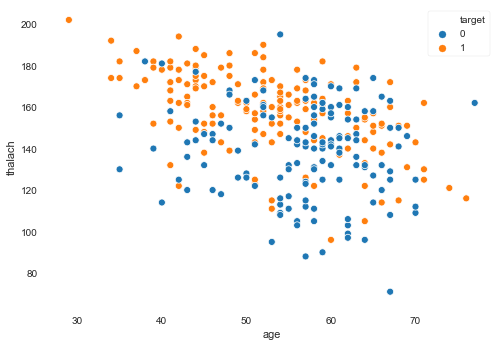

In [62]:
sns.scatterplot(data = df,x = 'age',y = 'thalach',hue = 'target' )

**4.3 不同年龄段，不同性别与患心脏病的关系**

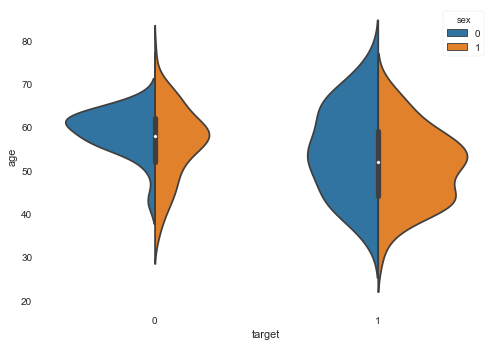

In [63]:
sns.violinplot(data = df,x = 'target',y = 'age',hue = 'sex',split = True)